### О задании
Результат работы − отчет в формате ноутбуков IPython (ipynb-файл). Код пишется на Python3. Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете также должен быть код, однако чем меньше кода, тем лучше всем: мне − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.    
Выполнение лабораторных работ занимает значительное время, поэтому не рекомендуем оставлять их на последний вечер перед сдачей.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) получают за всю лабораторную работу 0 баллов. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо в комментариях к коду указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

**Важно!!!** Прочитайте [руководство по написанию кода](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Работы, где будут грубо нарушены принципы оформления кода, будут штрафоваться!    
Также помните, что самая главная ошибка, которую надо избегать, - дублирование кода.

### Правила сдачи
Выполненную работу следует отправить на почту `nikmort@ya.ru` с указанием темы `[FBB hw <номер домашнего задани> Surname Name]`, например `FBB hw 2 Ivanov Petr`. Название отправляемого файла должно иметь следующий формат: `N_Surname_Name.ipynb`, где `N` — номер домашнего задания. Например, `2_Ivanov_Petr.ipynb`.

In [12]:
from random import sample
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import make_classification, make_blobs, make_circles, make_moons, load_digits
from sklearn.utils import shuffle as sklearn_shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

# SVM 

Для начала опробуем еще один изученный классификатор - SVM. Приницип работы этого классификатора состоит в построении гиперплоскости, разделяющей объекты в некотором пространстве.

Для начала посмотрим на работу классификатора на некоторых искусственных примерах. Ниже сгененировано несколько искусственных разделимых выборок: линейно разделимая, нелинейно разделимая и неразделимая. Вы также можете добавить еще выборок.

In [ ]:
X, y = {}, {}
X['blobs'], y['blobs'] = make_blobs(n_samples=400, n_features=2, centers=2, random_state=10, cluster_std=2.2)
X['circles'], y['circles'] = make_circles(n_samples=400, random_state=1, factor=0.2, noise=0.1)
X['moons'], y['moons'] = make_moons(n_samples=400, noise=0.07, random_state=1)
X['mix'], y['mix'] = make_classification(
    n_samples=400, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4
)

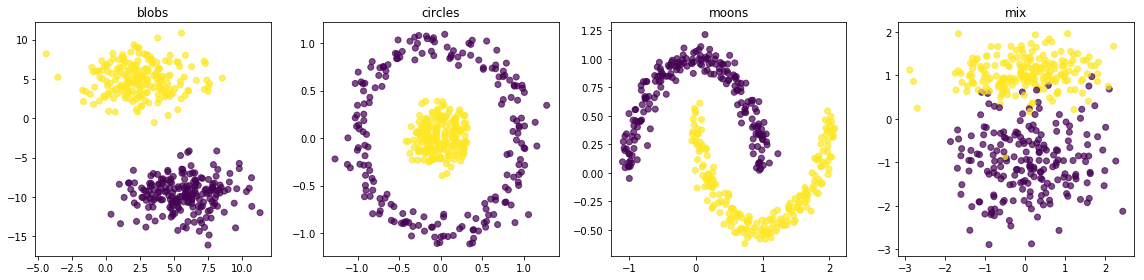

In [31]:
f, axarr = plt.subplots(1, len(X), figsize=(16, 4))
for case, ax in zip(X.keys(), axarr):
    y[case] = np.round(2 * (y[case] - 0.5))
    ax.scatter(X[case][:, 0], X[case][:, 1], c=y[case], alpha=0.7)
    ax.set_title(case);
f.tight_layout()

**(3 балла)** Протестируйте **линейный** SVM  на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Сделайте рисунки для разных значений параметра $C$.

Рекомендуется сделать рисунок с помощью `plt.subplots`: строки будут соответствовать разным значениям $C$, столбцы - разным выборкам.

Рекомендуется начать перебор $C$ с логарифмической сетки: от 0.01 до 100. Если вам покажется, что на такой сетке сложно сделать выводы, рассмотрите другую.

Что меняется в зависимости от значений $C$? Для каждой из выборок нарисуйте график зависимости числа опорных векторов от параметра $C$.

Для выполнения этого задания стоит вспомнить, что в обученном SVM есть атрибуты `support_vectors_`, `coef_`, `intercept_`.

**(2 балла)** Протестируйте полиномиальные (со степенями 2 и 3) SVM и SVM с гауссовским ядром на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Сделайте рисунки для разных значений параметра $C$.

Как влияет выбор ядра на работу SVM? На каких выборках наблюдается эффект? Как бы вы его объяснили?

**(2 балла)**. Выберите наиболее удачную конфигурацию SVM (ядро и значение $C$) и протестируйте поведение вашего SVM на тех же выборках в зависимости от параметра `gamma` (подберите сетку, которая обеспечивала бы наибольшую наглядность). Что меняется при варьировании этого параметра?

**(4 балла)** Давайте сравним этот классификатор с теми, что мы использовали в предыдущей домашней работе. Загрузите набор данных *data.adult.csv*, удалите объекты с пропущенными значениями. Оставьте только вещественные признаки. Нормируйте признаки.

Сравните классификаторы, выбрав их параметры по сетке (если вы делали это в прошлой работе, можете взять значения оттуда):

 - KNN — *n_neighbors* и *metric*
 - DecisonTree — *max_depth* и *max_features*,
 - RandomForest — *max_depth* и *max_features* (число деревьев можете взять из предыдущей работы),
 - SVC - *C* и *gamma* (ядро - по умолчанию).
 
*В качестве метрики качества используйте ROC-AUC.*

Обратите внимание, что эта операция может быть ресурсо- и трудоемкой.

Какой из алгоритмов имеет наилучшее качество? Как различаются их время работы и обучения? Имеет ли какие-нибудь преимущества SVC? Постройте сравнительную табличку для данных классификаторов.

# Мультиклассовая классификация

(**4 балла**) До этого момента мы все время решали задачи бинарной классификации. Давайте посмотрим, что можно делать в случае мультиклассовой классификации.

Так как решающие деревья и метод ближайших соседей без проблем обобщаются на случай множественных классов, будем работать с более интересном случаем - линейным классификатором (`LinearSVC`).

Ниже для вас сгенерировано несколько выборок (при желании вы можете рассмотреть и другие выборки). 

Рассмотрите два подхода к мультиклассовой классификации: [OneVsOneClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html) и [OneVsRestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html). Проделайте следующие шаги для каждой стратегии и прокомментируйте полученные результаты:
 - Изобразите точки выборки, а также разделяющие прямые (их должно быть по 3 для каждой из стратегий). Проведите эксперимент на всех сгенерированных выборках.
 - Какие особенности, преимущества и недостатки с точки зрения построения разделяющих плоскостей, качества разделения классов и вычислительной эффективности характерны для каждого метода?
 - Для каждой из стратегий приведите примеры ситуаций, когда стоит выбирать ее для решения задачи многоклассовой классификации.

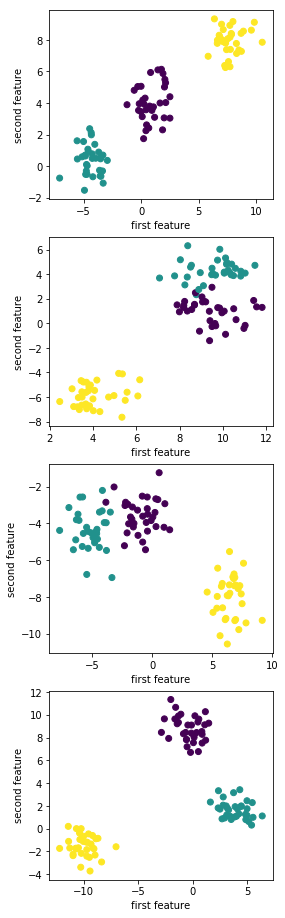

In [34]:
f, axarr = plt.subplots(4, 1, figsize=(4, 16))
for i, ax in enumerate(axarr):
    X, y = make_blobs(n_samples=100, n_features=2, centers=3, random_state=3+i**5)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    ax.set_xlabel('first feature')
    ax.set_ylabel('second feature')

# Кластеризация

В следующем блоке мы рассмотрим задачу кластеризации.

Для начала предлагается проанализировать поведение различных метрик. Сложно дать четкое определение, что такое хорошая кластеризация, однако можно сформулировать некоторые ее признаки:
 - объекты внутри кластера должны быть похожи друг на друга,
 - похожие объекты должны попадать в один кластер (этот пункт не следует из предыдущего!),
 - в случае, когда нам известны истинные метки классов, метрика не должна учитывать абсолютные значения меток объектов, полученных из кластеризации.

Вам предлагается сравнить 4 различных метрики:
 - [Homogeneity, Completeness и V-measure](http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure)
* _homogeneity_: мера того, что каждый кластер содержит только элементы одного класса.
* _completeness_: мера того, что все элементы одного класса попали в один кластер.
* _V-measure_: среднее гармоническое двух мер.
 - [Adjusted Rand index](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) 
 
Для выполнения задания используйте датасет, составленный из рукописных "картинок" цифр.

In [69]:
digits, labels = sklearn_shuffle(*load_digits(return_X_y=True))

В `labels` собраны названия цифр, в `digits` - их векторное представление:

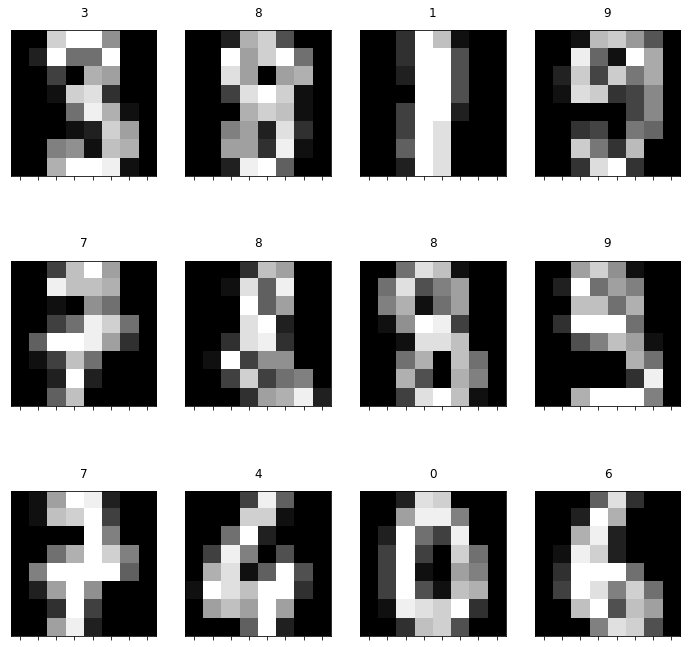

In [70]:
f, axarr = plt.subplots(3, 4, figsize=(12, 12))
plt.gray()
for ax, digit, label in zip(axarr.flatten(), digits, labels):
    ax.matshow(digit.reshape(8, 8))
    ax.tick_params(top='off', labeltop='off', left='off', labelleft='off', bottom='off')
    ax.set_title(label)

**(4 балла)** Кластеризуйте изображения при помощи алгоритма [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html): 
* Поcтройте графики зависимости значений метрик от числа кластеров (рекомендуется рассмотреть от 2 до 20 кластеров). Если графики получаются зашумленным, запустите алгоритм несколько раз из разных случайных положений центроидов и усредните результат.
* Визуализируйте изображения, соответствующие центроидам лучшей кластеризации. Что представляют собой эти изображения? 
* Визуализируйте несколько изображений, которые были отнесены к неправильному кластеру в случае лучшей кластеризации. Как вы думаете, почему они были неправильно кластеризованы?

Наши данные имеют относительно высокую размерность - 64. Попробуем уменьшить размерность и попробовать другие алгоритмы кластеризации.

**(1 балл)** Для наглядности попробуем уложить наши данные в двухмерное пространство. Примените [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) и [tSNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) к имеющися данным и визуалируйте полученный результат. Чем отличаются результаты этих двух подходов?

**(до 7 баллов)** К данным уменьшенной размерности примените алгоритмы кластеризации [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), [AffinityPropagation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html) и [MeanShift](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html). Подбор параметров - на ваше усмотрение. Для каких-то методов можно даже не делать перебор или ограничиться небольшой сеткой, главное - аргументировать, почему в этом случае это уместно. Метрику выберите на свою усмотрение, пояснив свой выбор.

Визуалируйте результат кластеризации (с лучшими параметрами) на каждом из способов уменьшения размерности.

Как вы считаете, помогло ли уменьшение размерности в данном датасете? Улучшено ли качество в сравнении с KMeans на полных данных? Сравните алгоритмы кластеризации: в чем преимущества и недостатки каждого из них?

# Исследовательская задача

**(до 15 баллов)** В этом задании не будет четких инструкций по выполнению. Вам будет дан массив текстов, ваша задача - выделить в этих текстах тематики. Также вам будет предложен некоторый "скелет" решения.

Данные будут представлены в виде матрицы [TF-IDF](https://ru.wikipedia.org/wiki/TF-IDF). Прочитайте, в чем ее смысл.

Загрузим тексты:

In [1]:
with open('texts.pickle', 'rb') as f:
    texts = pickle.load(f)

NameError: name 'pickle' is not defined

Примеры записей:

In [8]:
for text in sample(texts, 3):
    print(text)
    print(80 * '=')






I don't think your objection is beyond the bounds of rationality.  The
right mentioned in the bill is already established under the Second
Amendment; the bill should be reworded to reaffirm the Second Amendment
RKBA, and then establish the procedures for redress through the federal
court system.

The right already exists and is already embodied in our Constitution.


	It can be done, contact Chaparell cycle supply, they ought to have
the sprocket you need/want for cheap, well much cheaper than your average
dealership. Hey they even had sprockets for my VF1000R which is hard to find
accesssories for. 

					-Craig. 


----------------------------------------------------------------------------
Ladies and gentlemen, boys and girls, lend me your ears for but a moment,



	The National Legue Eastern Division Champions will be the...



       			Philadelphia Phillies


		I one hundred and ten percent guarantee!!!



	Chamberlain Hollins Dykstra Incaviglia Jackson Williams
	Daulton Gre

В текстах могут присутствовать подписи авторов, смайлики, сленговые слова. Часть текстов могут быть пустые или содержать мало слов.

Ниже построена матрица TF-IFD для этого корпуса текстов. В данной реализации оставлены только слова длины больше 3 и не рассматриваются стоп-слова из английского языка (например, "and", "the", "by"). Вы можете воспользоваться данной реализацией или использовать свою. Более подробно об инструменте для создания TF-IDF матрицы можно почитать [тут](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

**Важно!** Матрица хранится в sparse виде, работа с ней в dense форме может быть вычислительно сложна.

In [9]:
vectorizer = TfidfVectorizer(token_pattern=u'[a-z][a-z][a-z]+', stop_words='english')
tf_idf = vectorizer.fit_transform(texts)

In [10]:
type(tf_idf), tf_idf.shape

(scipy.sparse.csr.csr_matrix, (2334, 23431))

Вы можете получить список слов, соответствующих колонкам матрицы, следующей командой:

In [105]:
words = vectorizer.get_feature_names()
print(sample(words, 10))

['increases', 'wesleyan', 'modifications', 'wrt', 'minnesota', 'rules', 'raining', 'hartnett', 'suspects', 'enriched']


In [24]:
svd = TruncatedSVD(n_components=10)
US = svd.fit_transform(tf_idf)
S = svd.singular_values_
Vt = svd.components_

В этом задании вы попробуете представить сообщения векторами небольшой размерности. Идея вот в чём. Изначально каждое сообщение у нас представлена огромным количеством признаков: tf-idf индексами всех слов. SVD позволяет значительную часть информации собрать в нескольких новых признаках; тем самым, сообщения будут представлены достаточно короткими векторами.

Задайте число компонент равным 10 и визуализуйте сообщения в пространстве первых трёх новых признаков. Какие геометрические особенности датасета становятся видны? Стоят ли за этим какие-то содержательные закономерности?

Попробуйте рассмотреть несколько новых признаков и попытайтесь понять, какие из исходных признаков (то есть какие слова) вносят наибольший вклад. Для каждой компоненты это можно определить, взяв соотвествующий вектор в матрице V и посмотрев, на каких позициях стоят наибольшие и наименьшие значения этого вектора. Выпишите эти слова (соответствующие наибольшим значениям vs соответствующие наименьшим значениям). Как вы думаете, какие компоненты стоит выбрать для выделения тематик?

Сделайте выводы о представленных в текстах тематиках.

Далее, попробуйте кластеризовать (подумайте, какой кластеризатор тут наиболее уместен) тексты в пространстве новых признаков. На какие группы происходит разделение? Приведите примеры текстов из каждой группы. Обратите внимание, что из-за того, что большинство текстов не содержат содержательных фраз, хорошо кластеризуется лишь меньшая часть сообщений.